##**Linear Regression with sklearn API**

1. Dataset:California housing
2. Linear regression API:`LinearRegression`
3. Training: `fit`(normal equation) and `cross_validate`(normal equation with cross validations)
4. Evaluation:`score` (r2 score) and cross_val_score with different scoring parameters




In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
np.random.seed(306)
plt.style.use('seaborn')

We will use shuffleSplit cross validation with:
* 10 folds(n_splits) and
* set aside 20% examples as test example(test_size)

In [10]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

Creates 10 folds through shuffle split by keeping aside 20% examples as test in each fold

##**Step#1**:Load the dataset



In [11]:
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)

In [12]:
print("Shape of feature matrix:",features.shape)
print("Shape of label vector:",labels.shape)

Shape of feature matrix: (20640, 8)
Shape of label vector: (20640,)


In [13]:
assert(features.shape[0]==labels.shape[0])

##**Step#2**:Data exploration done before
##**Step#3**:Preprocessing and model building

In [14]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(
    features,labels,random_state=42)


In [15]:
print("tainings samples:",train_features.shape[0])
print("test samples:",test_features.shape[0])

tainings samples: 15480
test samples: 5160


In [16]:
assert(train_features.shape[0]==train_labels.shape[0])
assert(test_features.shape[0]==test_labels.shape[0])

##3.2 Pipeline:preprocessing+model

We will use `StandardScaler` feature scaling to bring all fetures on th same scale followed by a `LinearRegression` model

In [17]:
lin_reg_pipeline=Pipeline([("feature_Scaling",StandardScaler()),
                          ("lin_reg",LinearRegression())])

lin_reg_pipeline.fit(train_features,train_labels)

Pipeline(steps=[('feature_Scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [18]:
print("intercept (w_0):",lin_reg_pipeline[-1].intercept_)
print("weight vector(w_1,...,w_m:",lin_reg_pipeline[-1].coef_)

intercept (w_0): 2.0703489205426377
weight vector(w_1,...,w_m: [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


A couple of things to notice:

1. We accessed the `LinearRegression` object as `lin_reg_pipeline[-1]` which is the last step in the pipeline.
2. The intercept can be obtained via `intercept_member` variable and
3. The weight vector corresponsing to features via `coef_`

##**Step #4:**Model evaluation

Let's use `score` method to obtain train and test with twin objeectives:
* Estimation of model performance as provided by test error.
* Comaparision of errors for model dignostic purpose

In [19]:
test_score=lin_reg_pipeline.score(test_features,test_labels)
print("Model performance on test set:",test_score)

train_score=lin_reg_pipeline.score(train_features,train_labels)
print("Model performance on test set:",test_score)

Model performance on test set: 0.5910509795491352
Model performance on test set: 0.5910509795491352


The score method returns r2 score whose best value is 1.so here it points to underfitting issue.

In above score we calculated the score on one fold hence it may not be the robust score hence we introduce
##**Cross validates score(`cross_val_score`)**
This calculates score on different folds through cross validation

In [20]:
lin_reg_score=cross_val_score(lin_reg_pipeline,
                              train_features,
                              train_labels,
                              scoring='neg_mean_squared_error',
                              cv=shuffle_split_cv)

print(lin_reg_score)#prints 10 different score one for each fold

print(f"\nScore of linear regression model on the test set:\n"
      f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Score of linear regression model on the test set:
-0.529 +/- 0.022


Here we got the negative mean squared error as a score

In [21]:
lin_reg_mse=-lin_reg_score
print(f"\nMSE of linear regression model on the test set:\n"
      f"{lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}")


MSE of linear regression model on the test set:
0.529 +/- 0.022


##Cross validation

In [22]:
lin_reg_cv_results=cross_validate(lin_reg_pipeline,
                              train_features,
                              train_labels,
                              scoring='neg_mean_squared_error',
                              cv=shuffle_split_cv,
                              return_train_score=True,
                              return_estimator=True)

lin_reg_cv_result is a dictionary with the following contents
* trained estimators
* time taken for fitting and scoring
* training score
* test scores

In [23]:
lin_reg_cv_results

{'estimator': [Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_Scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]

In [24]:
train_error=-1*lin_reg_cv_results['train_score']
test_error=-1*lin_reg_cv_results['test_score']

print(f"\nMean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
print(f"\nMean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")


Mean squared error of linear regression model on the train set:
0.519 +/- 0.006

Mean squared error of linear regression model on the test set:
0.529 +/- 0.022


The training and test errors are high which is an indication of underfitting

In [25]:
feature_names=train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

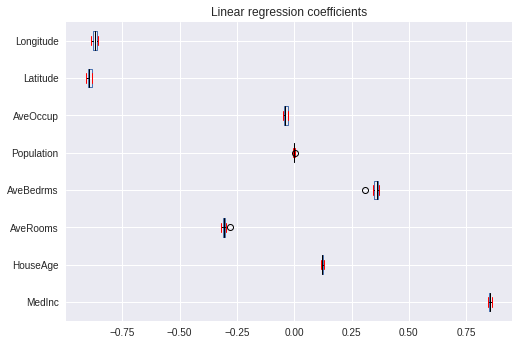

In [26]:
coefs=[est[-1].coef_ for est in lin_reg_cv_results["estimator"]]
weights_df=pd.DataFrame(coefs,columns=feature_names)

color={"whiskers":"black","medians":"black","caps":"red"}
weights_df.plot.box(color=color,vert=False)
_=plt.title("Linear regression coefficients")

In [27]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


##**Selecting best model**

In [28]:
best_model_index=np.argmin(test_error)
selected_model=lin_reg_cv_results['estimator'][best_model_index]

In [29]:
print("intercept (w_0):",selected_model['lin_reg'].intercept_)
print("Coefficients (w_1,...,w_m:",selected_model['lin_reg'].coef_)

intercept (w_0): 2.0779898917958657
Coefficients (w_1,...,w_m: [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


##Model performance

In [30]:
from sklearn.model_selection import cross_val_predict
cv_predictions=cross_val_predict(lin_reg_pipeline,train_features,train_labels)

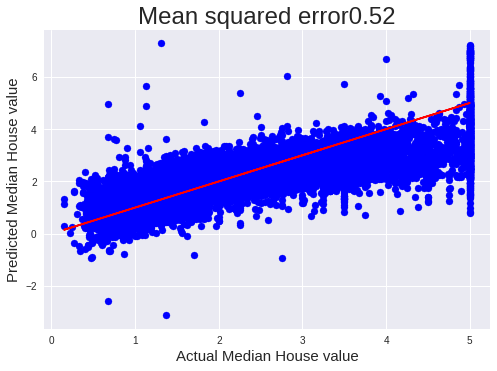

In [31]:
mse_cv=mean_squared_error(train_labels,cv_predictions)

plt.scatter(train_labels,cv_predictions,color='blue')
plt.plot(train_labels,train_labels,'r-')
plt.title(f"Mean squared error{mse_cv:.2f}",size=24)
plt.xlabel('Actual Median House value',size=15)
plt.ylabel('Predicted Median House value',size=15)
plt.show()

##**Step #5:**Predictions

Model in which we used cross validations

In [32]:
test_predictions_cv=selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

Model without cross validations

In [33]:
test_predictions=lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

##Step #6 Report model performance

In [34]:
mse=mean_squared_error(test_labels,test_predictions)
mse_cv=mean_squared_error(test_labels,test_predictions_cv)
print("MSE for the best model obtained via cross validation:",mse_cv)
print("MSE for model without cv:",mse)
        

MSE for the best model obtained via cross validation: 0.5393995876218523
MSE for model without cv: 0.5411287478470688


##**Baseline Models**

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import permutation_test_score 

##**Dummy Regressor**

In [36]:
def dummy_regressor_baseline(strategy,constant_val=None,quantile_val=None):
  baseline_model_median=DummyRegressor(strategy=strategy,
                                       constant=constant_val,
                                       quantile=quantile_val)
  baseline_median_cv_results=cross_validate(baseline_model_median,
                                            train_features,train_labels,
                                            cv=shuffle_split_cv,
                                            scoring="neg_mean_absolute_error",
                                            n_jobs=2)
  return pd.Series(-baseline_median_cv_results["test_score"],name="Dummy regressor error")  

In [37]:
baseline_median_cv_results_errors=dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors=dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors=dummy_regressor_baseline(strategy='constant',constant_val=2)
baseline_quantile_cv_results_errors=dummy_regressor_baseline(strategy='quantile',quantile_val=0.55)

##**permutation_test_score**
It permutes the target to generate randomized data and computes the empirical p-value against the null hypothesis,that features and targets are independent

In [38]:
score,permutation_score,pvalue=permutation_test_score(
    lin_reg_pipeline,train_features,train_labels,
    cv=shuffle_split_cv,scoring="neg_mean_absolute_error",
    n_jobs=2,n_permutations=30
)
permutaion_errors=pd.Series(-permutation_score,name="Permed error")

In [39]:
print(permutation_score)

[-0.91446539 -0.91608713 -0.91501122 -0.91112203 -0.91326112 -0.91428719
 -0.91694297 -0.90660687 -0.90873595 -0.91546138 -0.9084695  -0.91174023
 -0.91857102 -0.91467076 -0.90396709 -0.91239289 -0.91095499 -0.91729623
 -0.90529415 -0.91436609 -0.91993036 -0.91661883 -0.91104746 -0.91563156
 -0.91014294 -0.91526135 -0.90680247 -0.90796435 -0.91032999 -0.91545574]


In [40]:
erros_df=pd.concat([lin_reg_errors,baseline_meedian_cv_results_errors,permutaion_errors],axis=1)

NameError: ignored

##**Linear regression with iterative optimization:`SGDRegressor`**

SGD offers a lot of control over optimization procedure through a number of hyperparameters.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

A `random seed` is a starting point in generating random numbers. A random seed specifies the start point when a computer generates a random number sequence. This can be any number, but it usually comes from seconds on a computer system's clock

In [43]:
np.random.seed(306)

In [44]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [45]:
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
com_train_features,test_features,com_train_labels,test_labels=train_test_split(features,labels,random_state=42)

In [46]:
train_features,dev_features,train_labels,dev_labels=train_test_split(com_train_features,com_train_labels,random_state=42)

##**Baseline SGDRegressor**

* `Step1`: TO begin with we instantiate a baselline SGDRegressor model with default parameters.
* `Step 2`: Train the model with training features matrix and labels
* `Step 3`: Obtain the score on the training and dev data

In [48]:
sgd=SGDRegressor(random_state=42)
sgd.fit(train_features,train_labels)

train_mae=mean_absolute_error(train_labels,sgd.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd.predict(dev_features))
print("Mean absolute error oon Training set:",train_mae)
print("Mean absolute error oon developement set:",dev_mae)


Mean absolute error oon Training set: 312995824045833.75
Mean absolute error oon developement set: 315394681503071.94


We can observe that the mean absolute error is too high.The baseline model does not train well.This may happen due to large learning rate

So for reducing the mean absolute error first we 
##Add feature scaling step 

In [49]:
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                       ("sgd",SGDRegressor())])
sgd_pipeline.fit(train_features,train_labels)

train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print("Mean absolute error oon Training set:",train_mae)
print("Mean absolute error oon developement set:",dev_mae)


Mean absolute error oon Training set: 0.7935259642528993
Mean absolute error oon developement set: 1.5185221399033502


##step wise training of SGDRegressor
to check why error is high

* **Step 1**:Instantiate SGDRegressor with warm_start=True and tol=-np.infty.
* **Step 2**:Train SGD step by step and record regression loss in each step
* **Step 3**:Plot learning curves and see if there are any issues in training.


Text(0.5, 1.0, 'Learning curve:eta0=0.0100')

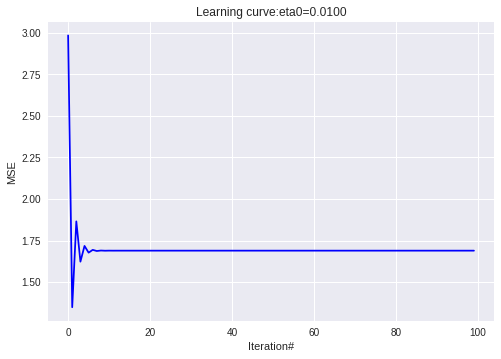

In [54]:
eta0=1e-2 ##learning rate
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                       ("SGD",SGDRegressor(max_iter=1,tol=-np.infty,
                                           warm_start=True,
                                           random_state=42))])
loss=[]
for epoch in range(100):
  sgd_pipeline.fit(train_features,train_labels)
  loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve:eta0={eta0:.4f}')

The loss reduced initialy and then incresed.This could be due to large learning rates.

Text(0.5, 1.0, 'Learning curve:eta0=0.0010')

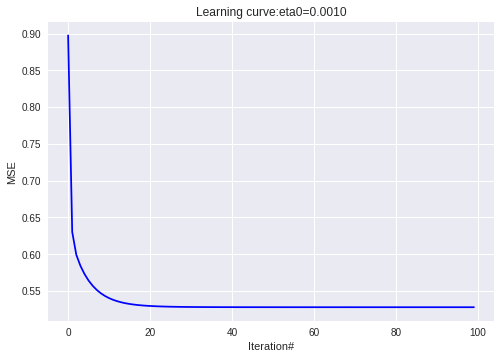

In [57]:
eta0=1e-3 #reducing the learning rate by 10
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                       ("SGD",SGDRegressor(max_iter=1,tol=-np.infty,
                                           warm_start=True,
                                           random_state=42,eta0=eta0))])
loss=[]
for epoch in range(100):
  sgd_pipeline.fit(train_features,train_labels)
  loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve:eta0={eta0:.4f}')

In [59]:
print("#iteration before reaching convergence criteria:",sgd_pipeline[-1].n_iter_)
print("#weight updates:",sgd_pipeline[-1].t_)

#iteration before reaching convergence criteria: 1
#weight updates: 11611.0


##Alternative method to fix learning rate by validation of curves

* `STEP1`: Provide the list of values to be tried for hyper-parameter
* `STEP2`: Instantiate an object of validation_curve with estimator training features and label.Set scoring parameter to relevant score.
* `STEP3`: Convert scores to error
* `STEP4`: Plot validation curve with the value of hyper-parameter on x-axis and error on the y-axis
* `Step5`: FIx the hyper-parameter value where the test error is the least.

In [62]:
%%time
eta0=[1e-5,1e-4,1e-3,1e-2]
train_scores,test_scores=validation_curve(
    sgd_pipeline,com_train_features,com_train_labels,param_name="SGD__eta0",
    param_range=eta0,cv=shuffle_split_cv,scoring="neg_mean_squared_error",
    n_jobs=2
)
train_errors,test_errors=-train_scores,-test_scores

CPU times: user 290 ms, sys: 16.2 ms, total: 306 ms
Wall time: 968 ms


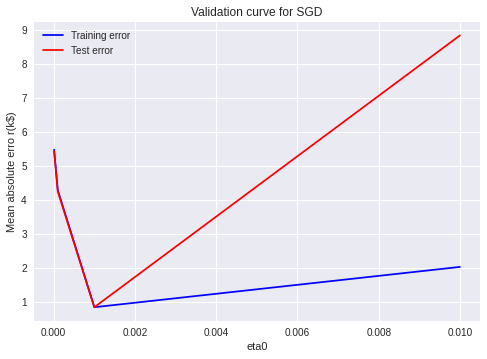

In [64]:
train_errors,test_errors=-train_scores,-test_scores
plt.plot(eta0,train_errors.mean(axis=1),'b-x',label="Training error")
plt.plot(eta0,test_errors.mean(axis=1),'r-x',label="Test error")
plt.legend()
plt.xlabel("eta0")
plt.ylabel("Mean absolute erro r(k$)")
_=plt.title("Validation curve for SGD")

Now by graph we can decide to set hyper parameter eta0

##**SGDRegressor**

In [66]:
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                       ("sgd",SGDRegressor(max_iter=500,
                                           early_stopping=True,
                                           eta0=1e-3,
                                           tol=1e-3,
                                           validation_fraction=0.2,
                                           n_iter_no_change=5,
                                           average=10,
                                           random_state=42))])
sgd_pipeline.fit(train_features,train_labels)

train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print("Mean absolute error oon Training set:",train_mae)
print("Mean absolute error oon developement set:",dev_mae)

Mean absolute error oon Training set: 0.579376454514559
Mean absolute error oon developement set: 0.5689180241137523


In [70]:
print("#iteration of SGD:",sgd_pipeline[-1].n_iter_)
print("#Number of weight updates:",sgd_pipeline[-1].t_) #basically (iterations*no.of exaamples in training)

#iteration of SGD: 7
#Number of weight updates: 81271.0


Above SGD was using inverse scaling as learning rate now we use `constant` learning rate means eta0 will remain same for last .There is another `adaptive` learning rate which basicaly remains constant untill convergence critiria is reached after that it got changed by dividing learning rate by 5

In [73]:
sgd_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                       ("sgd",SGDRegressor(max_iter=500,
                                           early_stopping=True,
                                           eta0=1e-3,
                                           tol=1e-3,
                                           learning_rate='constant',
                                           validation_fraction=0.2,
                                           n_iter_no_change=5,
                                           average=10,
                                           random_state=42))])
sgd_pipeline.fit(train_features,train_labels)

train_mae=mean_absolute_error(train_labels,sgd_pipeline.predict(train_features))
dev_mae=mean_absolute_error(dev_labels,sgd_pipeline.predict(dev_features))
print("Mean absolute error oon Training set:",train_mae)
print("Mean absolute error oon developement set:",dev_mae)

print("#iteration of SGD:",sgd_pipeline[-1].n_iter_)
print("#Number of weight updates:",sgd_pipeline[-1].t_) #basically (iterations*no.of exaamples in training)

Mean absolute error oon Training set: 0.5359339681114987
Mean absolute error oon developement set: 0.5151099728924144
#iteration of SGD: 8
#Number of weight updates: 92881.0


In [74]:
max_iter=np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0